In [1]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Step 2: Load the skincare dataset
df = pd.read_csv('skincare.csv')

In [3]:
# Step 3: Split data into features (X) and target (y)
X = df.drop('Treatment', axis=1)
y = df['Treatment']

In [4]:
# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

FOR CALCULATING THE ACCURACY

In [5]:
# Step 5: Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('age', StandardScaler(), ['Age']),
        ('categorical', OneHotEncoder(drop='first'), ['Skin Type', 'Skin Concerns'])
    ])

In [6]:
# Step 6: Define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [7]:
# Step 7: Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('age', StandardScaler(),
                                                  ['Age']),
                                                 ('categorical',
                                                  OneHotEncoder(drop='first'),
                                                  ['Skin Type',
                                                   'Skin Concerns'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [8]:
# Step 8: Make predictions on the testing set
predictions = model.predict(X_test)

In [9]:
# Step 11: Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 0.9285714285714286


FOR A SKINACRE ROUTINE RECOMMENDATION 

In [10]:
X = pd.get_dummies(df[['Skin Type', 'Skin Concerns']])
y = df['Treatment']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [13]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
def get_treatment_recommendation(skin_type, skin_concerns):
    # Create a DataFrame with the input data
    input_data = pd.DataFrame([[skin_type, skin_concerns]], columns=['Skin Type', 'Skin Concerns'])

    # One-hot encode the input data using the same columns as the training data
    input_data_encoded = pd.get_dummies(input_data).reindex(columns=X.columns, fill_value=0)

    treatment = model.predict(input_data_encoded)[0]
    return treatment

In [15]:
def generate_routine(treatment):
    routine_data = df[df['Treatment'] == treatment].iloc[0]
    am_routine = routine_data[['AM Cleanser', 'AM Toner/Astringent', 'AM Masks/Exfoliator', 'AM Serum', 'AM Moisturizer', 'AM Eye Treatment']]
    pm_routine = routine_data[['PM Cleanser', 'PM Toner/Astringent', 'PM Masks/Exfoliator', 'PM Serum', 'PM Moisturizer', 'PM Eye Treatment']]
    return am_routine, pm_routine

In [16]:
# Example Usage
skin_type = 'Dry'
skin_concerns = 'Fine lines'

In [17]:
# Get recommended treatment
recommended_treatment = get_treatment_recommendation(skin_type, skin_concerns)

# Generate AM and PM routine
am_routine, pm_routine = generate_routine(recommended_treatment)

print(f"Recommended Treatment: {recommended_treatment}")
print("\nAM Routine:")
print(am_routine)

print("\nPM Routine:")
print(pm_routine)

Recommended Treatment: Hydrating facial

AM Routine:
AM Cleanser                   Cream cleanser
AM Toner/Astringent       Alcohol-free toner
AM Masks/Exfoliator                      NaN
AM Serum                       Retinol serum
AM Moisturizer         Hydrating moisturizer
AM Eye Treatment        Anti-aging eye cream
Name: 12, dtype: object

PM Routine:
PM Cleanser                  Gentle cleanser
PM Toner/Astringent       Alcohol-free toner
PM Masks/Exfoliator                      NaN
PM Serum                       Retinol serum
PM Moisturizer         Hydrating moisturizer
PM Eye Treatment        Anti-aging eye cream
Name: 12, dtype: object


VISUALIZATION FOR THE SKINCARE RECOMMENDATION SYSTEM

Visualization 1: Confusion Matrix

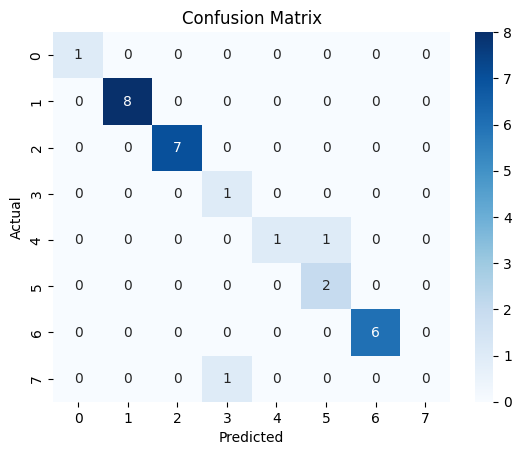

In [18]:
# Generate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Visualization 2: Feature Importance

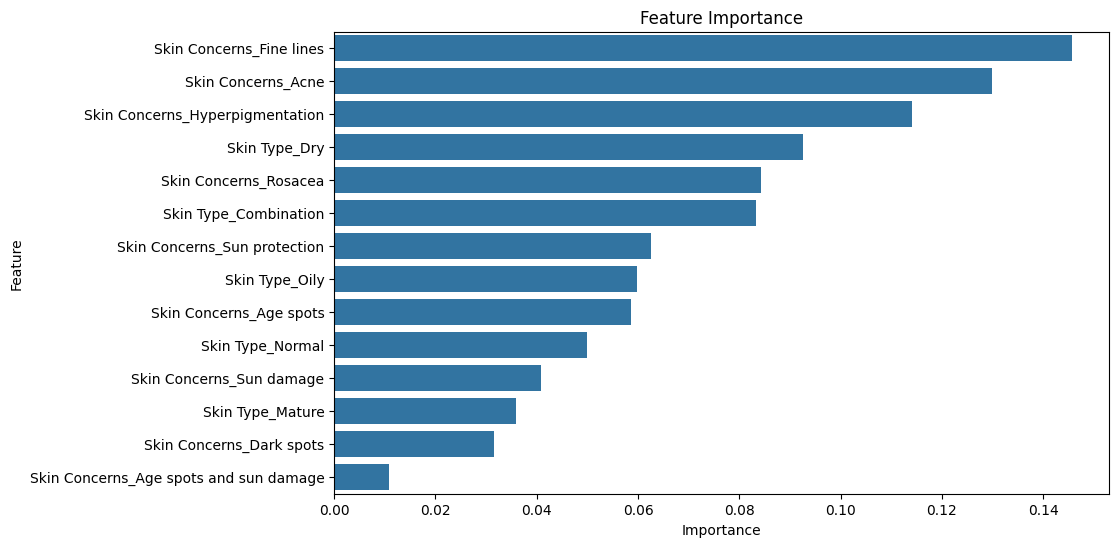

In [19]:
# Get feature importances from the model
feature_importances = model.feature_importances_

# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


Visualization 3: Routine Recommendation

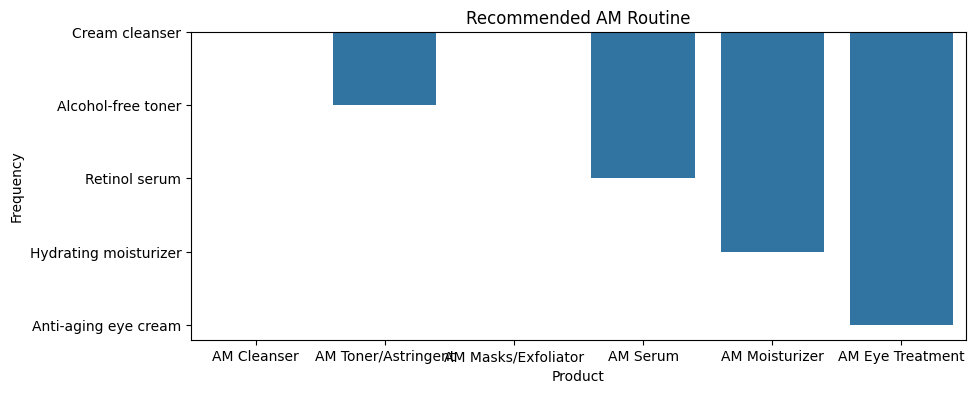

In [20]:
# Plot the AM routine
plt.figure(figsize=(10, 4))
sns.barplot(x=am_routine.index, y=am_routine.values)
plt.title('Recommended AM Routine')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.show()


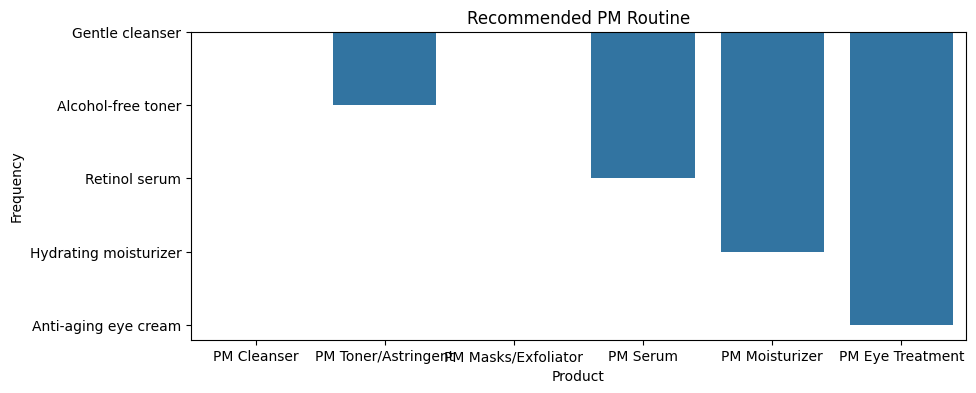

In [21]:
# Plot the PM routine
plt.figure(figsize=(10, 4))
sns.barplot(x=pm_routine.index, y=pm_routine.values)
plt.title('Recommended PM Routine')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.show()

Visualization 4: Distribution of Skin Types and Concerns

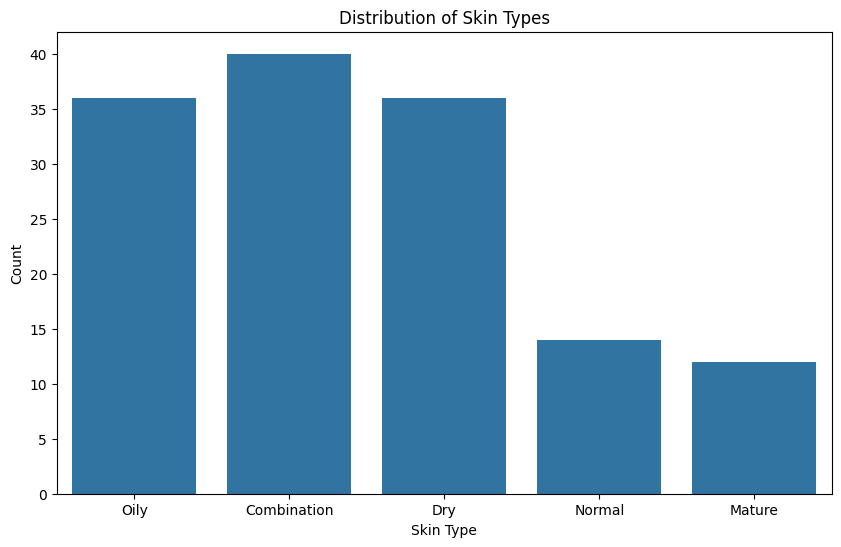

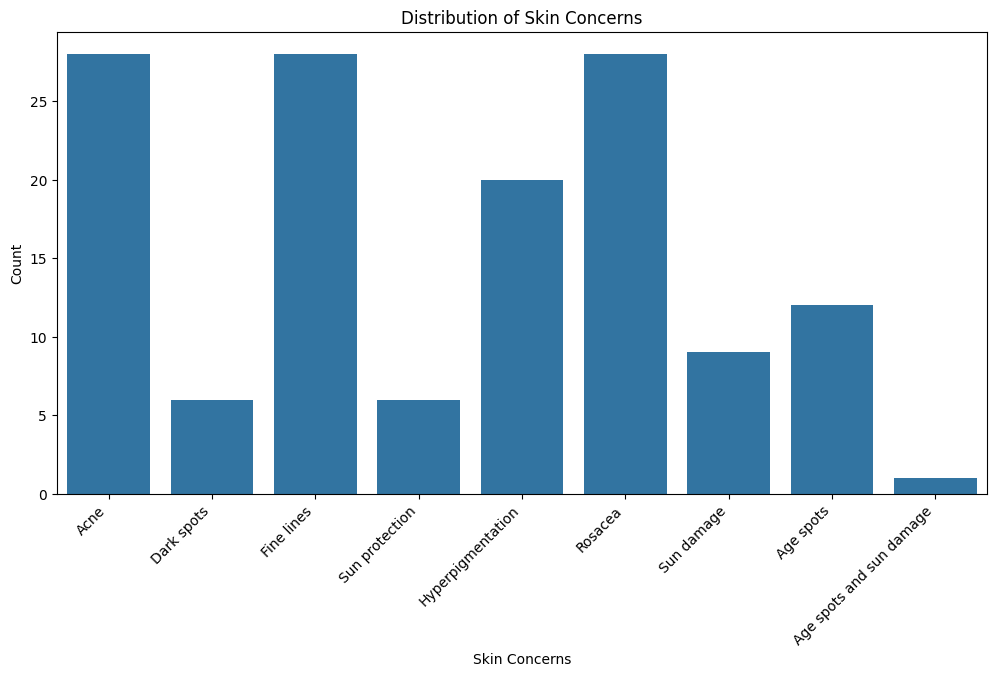

In [22]:
# Plot the distribution of Skin Types
plt.figure(figsize=(10, 6))
sns.countplot(x='Skin Type', data=df)
plt.title('Distribution of Skin Types')
plt.xlabel('Skin Type')
plt.ylabel('Count')
plt.show()

# Plot the distribution of Skin Concerns
plt.figure(figsize=(12, 6))
sns.countplot(x='Skin Concerns', data=df)
plt.title('Distribution of Skin Concerns')
plt.xlabel('Skin Concerns')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


Visualization 5: Treatment Distribution

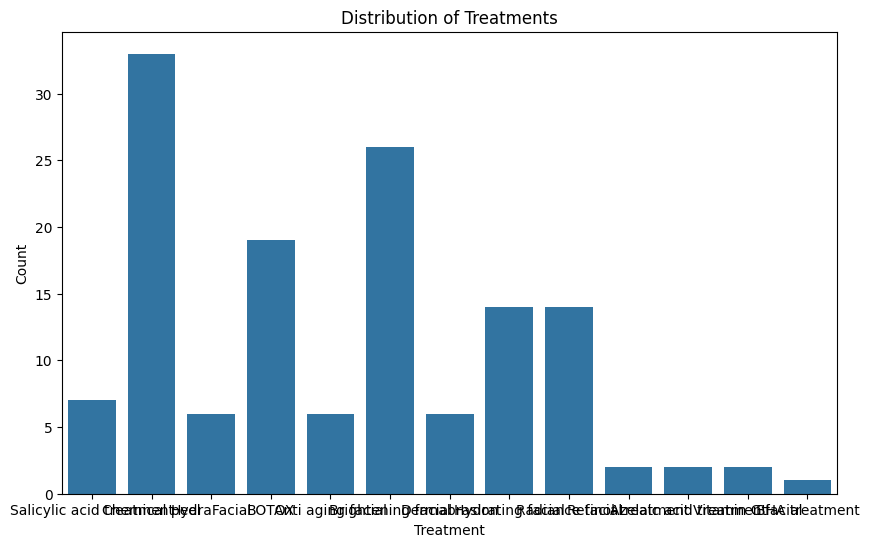

In [23]:
# Plot the distribution of Treatments
plt.figure(figsize=(10, 6))
sns.countplot(x='Treatment', data=df)
plt.title('Distribution of Treatments')
plt.xlabel('Treatment')
plt.ylabel('Count')
plt.show()


Visualization 6: Actual vs. Predicted Treatment

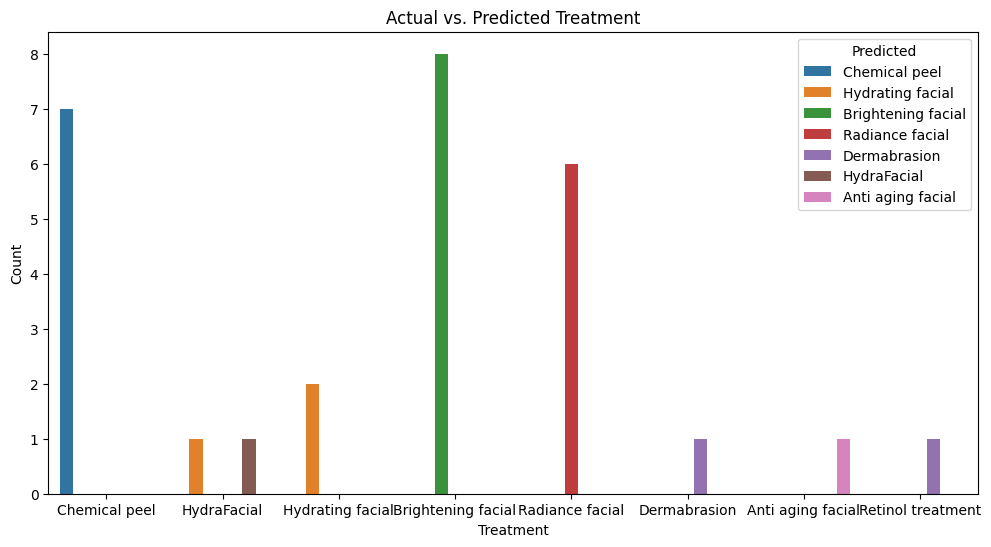

In [24]:
# Create a DataFrame with actual and predicted treatments
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

# Plot a bar chart comparing actual and predicted treatments
plt.figure(figsize=(12, 6))
sns.countplot(x='Actual', hue='Predicted', data=result_df)
plt.title('Actual vs. Predicted Treatment')
plt.xlabel('Treatment')
plt.ylabel('Count')
plt.show()


Visualization 7: Model Accuracy

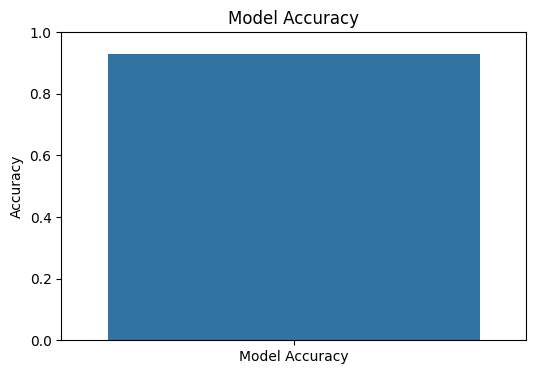

In [25]:
# Plot the accuracy of the model
plt.figure(figsize=(6, 4))
sns.barplot(x=['Model Accuracy'], y=[accuracy])
plt.ylim(0, 1)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.show()


Visualization 8: Pair Plot for Selected Features

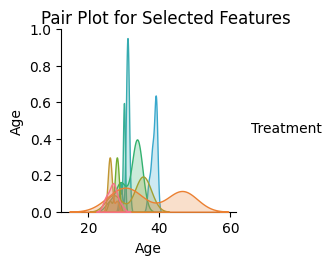

In [26]:
# Select a subset of features for pair plot
selected_features = ['Age', 'Skin Type', 'Skin Concerns']

# Add the target variable for hue
selected_features_with_target = selected_features + ['Treatment']

# Create a pair plot for selected features
sns.pairplot(df[selected_features_with_target], hue='Treatment')
plt.suptitle('Pair Plot for Selected Features', y=1.02)
plt.show()


Visualization 9: Boxplot for Age and Treatment

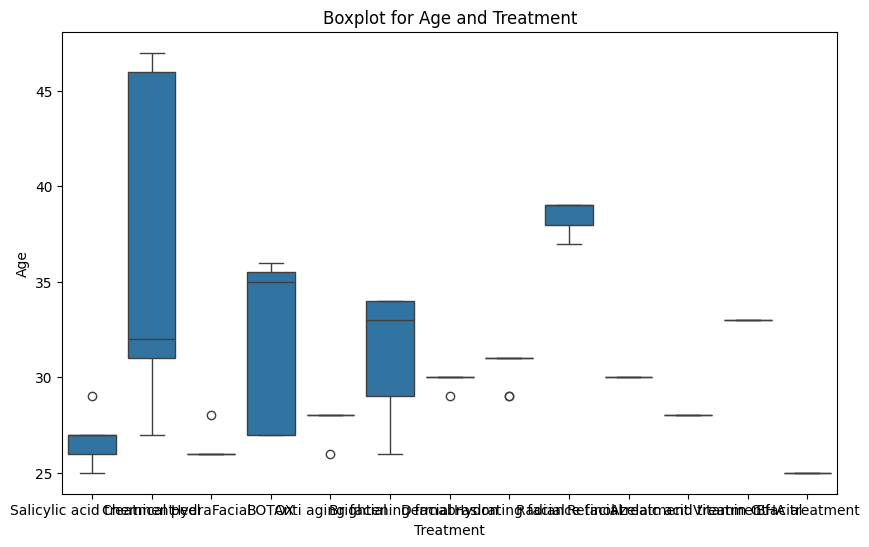

In [27]:
# Create a boxplot for Age and Treatment
plt.figure(figsize=(10, 6))
sns.boxplot(x='Treatment', y='Age', data=df)
plt.title('Boxplot for Age and Treatment')
plt.xlabel('Treatment')
plt.ylabel('Age')
plt.show()


Visualization 10: Countplot for Skin Type and Treatment

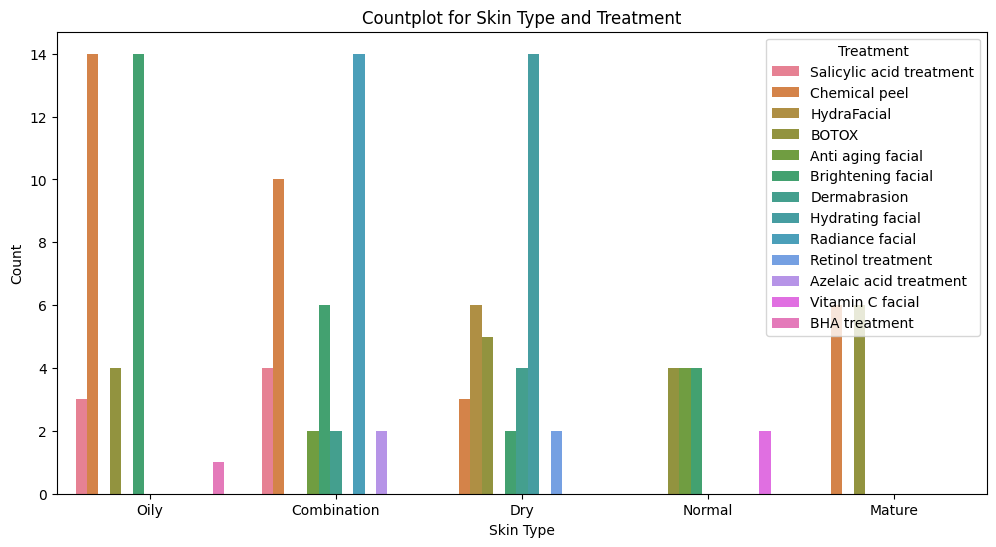

In [28]:
# Create a countplot for Skin Type and Treatment
plt.figure(figsize=(12, 6))
sns.countplot(x='Skin Type', hue='Treatment', data=df)
plt.title('Countplot for Skin Type and Treatment')
plt.xlabel('Skin Type')
plt.ylabel('Count')
plt.show()


MODEL EVALUATIONS METRICS

In [30]:
from sklearn.metrics import classification_report

# Print classification report for precision, recall, and F1-score
classification_rep = classification_report(y_test, predictions)
print("Classification Report:\n", classification_rep)


Classification Report:
                     precision    recall  f1-score   support

 Anti aging facial       1.00      1.00      1.00         1
Brightening facial       1.00      1.00      1.00         8
     Chemical peel       1.00      1.00      1.00         7
      Dermabrasion       0.50      1.00      0.67         1
       HydraFacial       1.00      0.50      0.67         2
  Hydrating facial       0.67      1.00      0.80         2
   Radiance facial       1.00      1.00      1.00         6
 Retinol treatment       0.00      0.00      0.00         1

          accuracy                           0.93        28
         macro avg       0.77      0.81      0.77        28
      weighted avg       0.92      0.93      0.91        28



C:\Users\susmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\susmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\susmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1469

CROSS-VALIDATION SCORE

In [31]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation and print the mean accuracy
cross_val_acc = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Mean Accuracy:", cross_val_acc.mean())


C:\Users\susmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Mean Accuracy: 0.6272727272727273


In [32]:
import tkinter as tk
from tkinter import ttk

# Function to get treatment recommendation and routines
def get_recommendation():
    skin_type = skin_type_var.get()
    skin_concerns = skin_concerns_var.get()

    recommended_treatment = get_treatment_recommendation(skin_type, skin_concerns)
    am_routine, pm_routine = generate_routine(recommended_treatment)

    result_label.config(text=f"Recommended Treatment: {recommended_treatment}")
    am_routine_label.config(text=f"AM Routine:\n{am_routine}")
    pm_routine_label.config(text=f"PM Routine:\n{pm_routine}")

# Create the main window
window = tk.Tk()
window.title("Skincare Recommendation System")

# Create labels and entry widgets
skin_type_label = ttk.Label(window, text="Enter Skin Type:")
skin_type_var = tk.StringVar()
skin_type_entry = ttk.Entry(window, textvariable=skin_type_var)

skin_concerns_label = ttk.Label(window, text="Enter Skin Concerns:")
skin_concerns_var = tk.StringVar()
skin_concerns_entry = ttk.Entry(window, textvariable=skin_concerns_var)

result_label = ttk.Label(window, text="")
am_routine_label = ttk.Label(window, text="")
pm_routine_label = ttk.Label(window, text="")

# Create a button to trigger the recommendation
recommend_button = ttk.Button(window, text="Get Recommendation", command=get_recommendation)

# Place widgets in the window
skin_type_label.grid(row=0, column=0, padx=10, pady=5, sticky="e")
skin_type_entry.grid(row=0, column=1, padx=10, pady=5)

skin_concerns_label.grid(row=1, column=0, padx=10, pady=5, sticky="e")
skin_concerns_entry.grid(row=1, column=1, padx=10, pady=5)

recommend_button.grid(row=2, column=0, columnspan=2, pady=10)

result_label.grid(row=3, column=0, columnspan=2, pady=10)
am_routine_label.grid(row=4, column=0, columnspan=2, pady=10)
pm_routine_label.grid(row=5, column=0, columnspan=2, pady=10)

# Run the Tkinter event loop
window.mainloop()
